*Forecast the CocaCola prices. 

* Prepare a document explaining how many dummy variables you have created
* RMSE value for each model.
* Finally which model you will use for Forecasting.

* loaded the dataset for Cococola sales
* There were 42 observations and 2 features
* The dataset has sales count of coco cola for four quarters from year 1986 to 1996
* Created dummy columns for each quarter -- Q1, Q2, Q3, Q4 
* Calculated the RMSE values for various models & RMSE was lowest for the exponential multiplicative Additive Seasonality
* Then created 'new_data' dataset from the original dataset for testing purpose(for 1995).
* Trained the model on the dataset which has data upto 1994 
* Predicted the Sales values for all 4 quarters (for 1995) using the best model and plotted graph for the same.

In [206]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import seaborn as sns

from numpy import log

In [207]:
ds_coke = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', parse_dates=['Quarter'])
print(ds_coke.shape)

(42, 2)


In [208]:
ds_coke.head

<bound method NDFrame.head of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95

In [209]:
ds_coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


<AxesSubplot:>

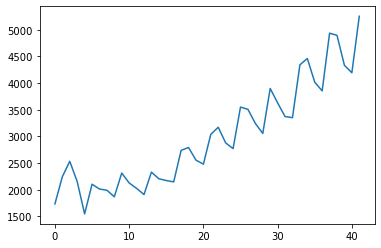

In [210]:
ds_coke.Sales.plot()

In [211]:
def separateQuarter(x):
    list_q = x.split('_')
    return list_q[0]

ds_coke['quarters'] = ds_coke['Quarter'].apply(separateQuarter)

dummy = pd.DataFrame(pd.get_dummies(ds_coke['quarters']))
ds_coke = pd.concat([ds_coke,dummy], axis=1)
ds_coke

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [212]:
def caculateYear(x):
    items  = x.split('_')
    year   = items[1]
    finalyear = '19'+year
    return int(finalyear)

ds_coke['year'] = ds_coke['Quarter'].apply(caculateYear)
ds_coke.head(5)

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year
0,Q1_86,1734.827000,Q1,1,0,0,0,1986
1,Q2_86,2244.960999,Q2,0,1,0,0,1986
2,Q3_86,2533.804993,Q3,0,0,1,0,1986
3,Q4_86,2154.962997,Q4,0,0,0,1,1986
4,Q1_87,1547.818996,Q1,1,0,0,0,1987


In [213]:
t_list = [x for x in range(1,len(ds_coke)+1)]
ds_coke['t'] = t_list

ds_coke['t_square'] = ds_coke['t']*ds_coke['t']

#log transformation
ds_coke['log_sales'] = log(ds_coke.Sales)
ds_coke.head(15)

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1986,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1986,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,1986,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,1986,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1987,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,1987,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,1987,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,1987,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1988,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,1988,10,100,7.746574


<AxesSubplot:xlabel='quarters', ylabel='year'>

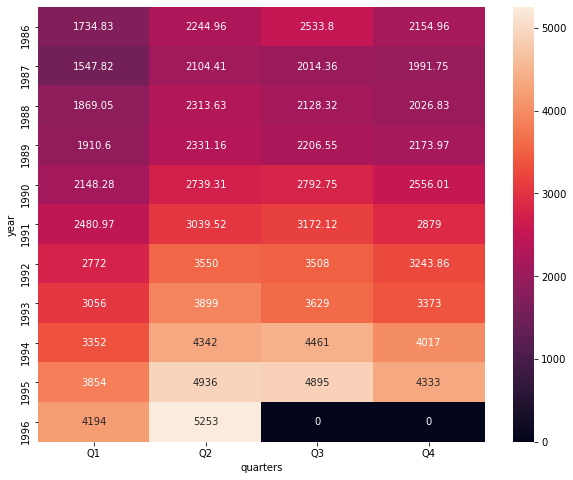

In [214]:
heatmap_passengers = pd.pivot_table(data=ds_coke,values='Sales',index='year',
                                    columns='quarters',aggfunc='mean',fill_value=0)

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_passengers, annot=True, fmt='g')

<AxesSubplot:xlabel='year', ylabel='Sales'>

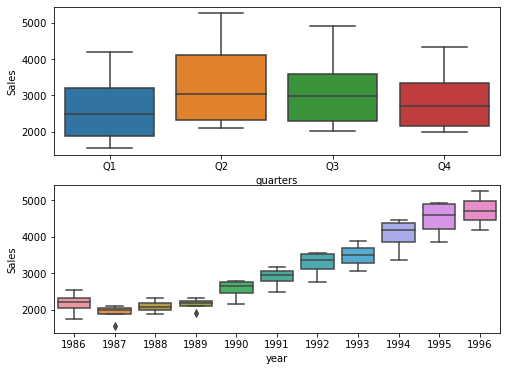

In [215]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='quarters', y='Sales', data=ds_coke)
plt.subplot(212)
sns.boxplot(x='year', y='Sales', data=ds_coke)

<AxesSubplot:xlabel='year', ylabel='Sales'>

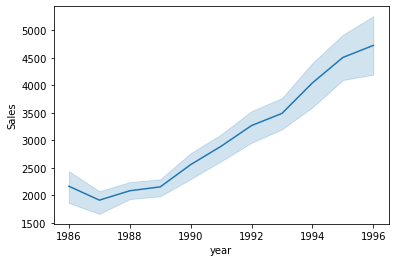

In [216]:
sns.lineplot(x='year',y='Sales',data=ds_coke)

<AxesSubplot:xlabel='quarters', ylabel='Sales'>

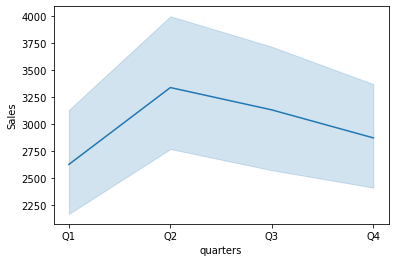

In [217]:
sns.lineplot(x='quarters',y='Sales',data=ds_coke)

In [218]:
x_train = ds_coke.head(30)
x_test  = ds_coke.tail(12)
x_train

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1986,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1986,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,1986,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,1986,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1987,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,1987,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,1987,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,1987,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1988,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,1988,10,100,7.746574


In [219]:
le_model         = smf.ols('Sales~t',data=x_train).fit()
predicted_linear = pd.Series(le_model.predict(pd.DataFrame(x_test['t'])))
rmse_linear      = np.sqrt(np.mean(np.array(x_test['Sales'])-np.array(predicted_linear))**2)
rmse_linear      = round(rmse_linear,2)
rmse_linear

545.51

In [220]:
#Exponential

Exp      = smf.ols('log_sales~t',data=x_train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(x_test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(x_test['log_sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp = round(rmse_Exp,2)
rmse_Exp

3862.67

In [221]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=x_train).fit()
pred_Quad = pd.Series(Quad.predict(x_test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad = round(rmse_Quad,2)
rmse_Quad

646.27

In [222]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3',data=x_train).fit()
pred_add_sea = pd.Series(add_sea.predict(x_test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea = round(rmse_add_sea,2)
rmse_add_sea

1778.01

In [223]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3',data=x_train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(x_test[['Q1','Q2','Q3','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad = round(rmse_add_sea_quad,2)
rmse_add_sea_quad

586.05

In [224]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',
                  data = x_train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(x_test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = round(rmse_Mult_sea,2)
rmse_Mult_sea

1828.92

In [225]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = x_train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(x_test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(x_test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = round(rmse_Mult_add_sea,2)
rmse_Mult_add_sea

410.25

In [226]:
#comparing the results
model_list                = ["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
                                 "rmse_Mult_add_sea"]
rmse_val_list             = [rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                 rmse_Mult_add_sea]

table_rmse                = pd.DataFrame(columns=['Model','RMSE Values'])
table_rmse['Model']       = model_list
table_rmse['RMSE Values'] = rmse_val_list

table_rmse.sort_values(by=['RMSE Values'])

,Model,RMSE Values
6,rmse_Mult_add_sea,410.25
0,rmse_linear,545.51
4,rmse_add_sea_quad,586.05
2,rmse_Quad,646.27
3,rmse_add_sea,1778.01
5,rmse_Mult_sea,1828.92
1,rmse_Exp,3862.67


## Predict for new time period

In [246]:
ds_coke1 = ds_coke.copy()
new_data = ds_coke1.iloc[36:40,:]
#new_data = ds_coke1.tail(2)
new_data

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
36,Q1_95,3854.0,Q1,1,0,0,0,1995,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,1995,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,1995,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,1995,40,1600,8.374015


In [247]:
new_data.drop(columns=['Sales','log_sales'], axis=1, inplace=True)

In [248]:
new_data

,Quarter,quarters,Q1,Q2,Q3,Q4,year,t,t_square
36,Q1_95,Q1,1,0,0,0,1995,37,1369
37,Q2_95,Q2,0,1,0,0,1995,38,1444
38,Q3_95,Q3,0,0,1,0,1995,39,1521
39,Q4_95,Q4,0,0,0,1,1995,40,1600


In [249]:
ds_coke1 = ds_coke1.head(36)
#ds_coke1 = ds_coke1.head(40)
print(ds_coke1.shape)
ds_coke1

(36, 11)


,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1986,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,1986,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,1986,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,1986,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,1987,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,1987,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,1987,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,1987,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,1988,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,1988,10,100,7.746574


In [250]:
#picked the model with the lowest RMSE value
#training the model on the entire dataset
model_full = smf.ols('log_sales~t+Q1+Q2+Q3',data = ds_coke1).fit()
predicted_new = model_full.predict(new_data)
predicted_new

36    8.175390
37    8.416853
38    8.410661
39    8.335240
dtype: float64

In [251]:
new_data['forecasted_sales'] = predicted_new
new_data

,Quarter,quarters,Q1,Q2,Q3,Q4,year,t,t_square,forecasted_sales
36,Q1_95,Q1,1,0,0,0,1995,37,1369,8.175390
37,Q2_95,Q2,0,1,0,0,1995,38,1444,8.416853
38,Q3_95,Q3,0,0,1,0,1995,39,1521,8.410661
39,Q4_95,Q4,0,0,0,1,1995,40,1600,8.335240


In [252]:
ds_coke.iloc[36:40,:]

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4,year,t,t_square,log_sales
36,Q1_95,3854.0,Q1,1,0,0,0,1995,37,1369,8.256867
37,Q2_95,4936.0,Q2,0,1,0,0,1995,38,1444,8.504311
38,Q3_95,4895.0,Q3,0,0,1,0,1995,39,1521,8.495970
39,Q4_95,4333.0,Q4,0,0,0,1,1995,40,1600,8.374015


<AxesSubplot:>

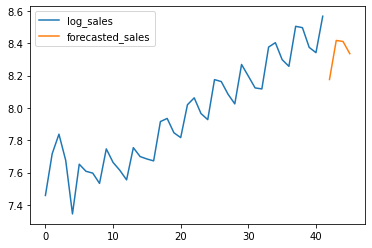

In [253]:
new_var = pd.concat([ds_coke,new_data])
new_var[['log_sales','forecasted_sales']].reset_index(drop=True).plot()

<AxesSubplot:title={'center':'Coco cola sales for the year 1995'}, xlabel='quarters', ylabel='forecasted_sales'>

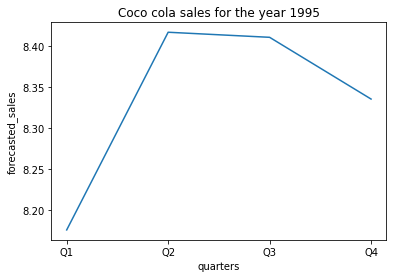

In [261]:
plt.title('Coco cola sales for the year 1995')
sns.lineplot(x='quarters',y='forecasted_sales',data=new_data)